# Requirements

In [2]:
import os

import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV

In [9]:
symbol = "BTCUSDT"
filename = f"../../csv_data/{symbol}.csv"
if not os.path.exists(filename):
    raise Exception("CSV file doesn`t exist.")
df = pd.read_csv(filename)
df.head()


,time_open,Low,Volume,High,Open,Close,number_of_trades
0,2017-08-17 07:01:00,4261.48,0.000000,4261.48,4261.48,4261.48,0.0
1,2017-08-17 07:02:00,4280.56,0.261074,4280.56,4280.56,4280.56,2.0
2,2017-08-17 07:03:00,4261.48,0.012008,4261.48,4261.48,4261.48,3.0
3,2017-08-17 07:04:00,4261.48,0.140796,4261.48,4261.48,4261.48,1.0
4,2017-08-17 07:05:00,4261.48,0.140796,4261.48,4261.48,4261.48,1.0


# Data preprocessing

In [10]:
df["time_open"] = pd.to_datetime(df.time_open)
df.set_index("time_open", inplace=True)
df = df.resample("1d").agg({
    "Low": "min",
    "Volume": "sum",
    "High": "max",
    "Open": "first",
    "Close": "last",
    "number_of_trades": "sum"
})
df.head()

,Low,Volume,High,Open,Close,number_of_trades
time_open,,,,,,
2017-08-17,4200.74,623.174193,4485.39,4261.48,4346.74,2911.0
2017-08-18,3981.13,1351.423278,4371.52,4346.74,4021.11,5575.0
2017-08-19,3850.00,509.768445,4184.69,4015.40,4075.98,3047.0
2017-08-20,4032.62,441.766492,4211.08,4075.98,4140.93,2550.0
2017-08-21,3911.79,807.452399,4171.62,4140.93,4025.04,4699.0


# Plot the data

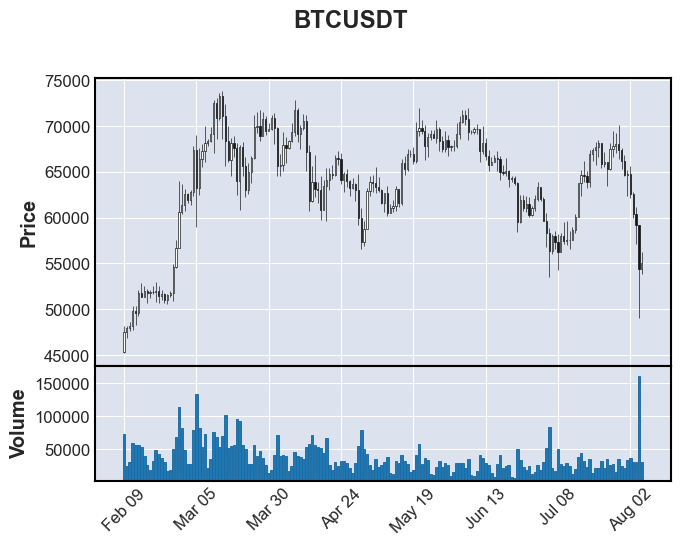

In [15]:
mpf.plot(df.iloc[-180:], type='candle', volume=True, title="BTCUSDT")
mpf.plot(df.iloc[-180:], type='candle', volume=True, title="BTCUSDT", savefig=f"{symbol}_last_180_candles.png")